# Solution Exponential Integrate and Fire Neuron

first name: Camilla

last name: Carta

sciper: 215621

date: 25/02/2019

*Your teammate*

first name of your teammate: Bruno

last name of your teammate: Da Costa Borges

sciper of your teammate: 205629


** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex1_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

Exercise instructions are given in this notebook file.

** Rules: **

1) You are strongly encouraged to work in groups of 2. You are allowed to work alone. Groups of 3 or more are NOT allowed

2) If you work in a group of 2, BOTH people should upload the same notebook file  

3) If you work alone, you can't share your notebook file with anyone else

4) Discussion between groups is encouraged, but you can't share your code or text

5) The points assigned to each exercise are indicated in the notebook file

6) You should upload a jupyter notebook file with all code run and picture visible. We are not going to run your notebook.

7) Read carefully the instructions at the beginning of the notebook file, answer in a clear and concise way to open questions

8) You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester

# Ex. 3 The Exponential Integrate-and-Fire model

The module [exponential_integrate_fire.exp_IF](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html#module-neurodynex.exponential_integrate_fire.exp_IF) implements the dynamics given in the book [(equation 5.6)](https://neuronaldynamics.epfl.ch/online/Ch5.S2.html).

To get started, use the following code. It follows a common pattern used in these exercises: use the input_factory to get a specific current, inject it into the neuron model we provide, and finally use the plot_tools to visualize the state variables:

In [ ]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

creating /tmp/scipy-kumilla-rwwMQE/python27_intermediate/compiler_dca32ba36a7317520a14e81b6e6de561
nr of spikes: 7


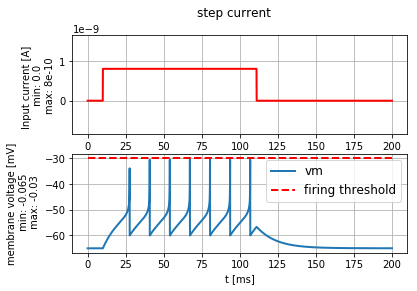

In [1]:
input_current = input_factory.get_step_current(
    t_start=10, t_end=110, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

Note that you can change all parameters of the neuron by using the named parameters of the function [`simulate_exponential_IF_neuron()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html#neurodynex.exponential_integrate_fire.exp_IF.simulate_exponential_IF_neuron). If you do not specify any parameter, the default values are used. You can access these variables in your code by prefixing them with the module name (for example `exp_IF.FIRING_THRESHOLD_v_spike`).

## 3.1 Rehobase Threshold [5 points]
The goal of this exercise is to study the minimal current that can elicit a spike and to understand the different notions of a firing threshold. The Exponential-Integrate-and-Fire neuron model has two threshold related parameters. They correspond to the named parameters `v_spike` and `v_rheobase` in the function [`simulate_exponential_IF_neuron()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.exponential_integrate_fire.html#neurodynex.exponential_integrate_fire.exp_IF.simulate_exponential_IF_neuron).


Modify the code example given above: 
- Call `simulate_exponential_IF_neuron()` and set the function parameter `v_spike=+15mV` (which overrides the default value -30mV). What do you expect to happen? How many spikes will be generated? [max 2 lines, 1 point]

nr of spikes: 7


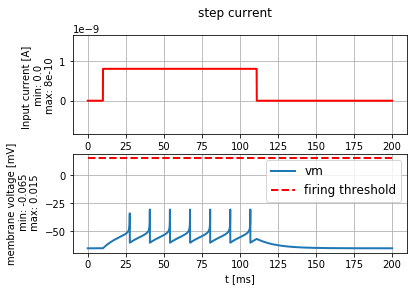

In [28]:
exp_IF.FIRING_THRESHOLD_v_spike = +15*b2.mvolt

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms, v_spike = exp_IF.FIRING_THRESHOLD_v_spike)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

your answer

- Call `simulate_exponential_IF_neuron()` and set the function parameter `v_rheobase=-57mV` (which overrides the default value -55mV). What do you expect to happen?  [max 2 lines, 1 point]

nr of spikes: 0


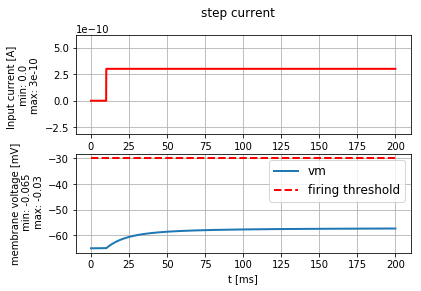

In [33]:
exp_IF.FIRING_THRESHOLD_v_spike = -30*b2.mvolt
exp_IF.RHEOBASE_THRESHOLD_v_rh = -57*b2.mvolt

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms, v_spike = exp_IF.FIRING_THRESHOLD_v_spike, v_rheobase = exp_IF.RHEOBASE_THRESHOLD_v_rh)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

your answer

Using `v_rheobase=-57mV` for the rest of exercise 3,
- Compute the minimal amplitude `I_rh` of a constant input current such that the neuron will elicit a spike. Insert your answer in the code below. If you are not sure what and how to compute `I_rh`, have a look at Figure 5.1 and the textbox “Rheobase threshold and interpretation of parameters” in the [book](https://neuronaldynamics.epfl.ch/online/Ch5.S2.html).[2 points]
- Validate your result: Modify the code given above and inject a current of amplitude `I_rh` and 300 ms duration into the expIF neuron.[1 points]



In [51]:
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF

exp_IF.RHEOBASE_THRESHOLD_v_rh = -57*b2.mvolt

# TODO: should we use sharpness or not?
#I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST )/ exp_IF.MEMBRANE_RESISTANCE_R # insert your expression here. For the variables we did not specified, do not just enter the default values but compute it using variables like exp_IF.V_REST 
I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST - exp_IF.SHARPNESS_delta_T)/ exp_IF.MEMBRANE_RESISTANCE_R # insert your expression here. For the variables we did not specified, do not just enter the default values but compute it using variables like exp_IF.V_REST 
I_rh

300. * pamp

nr of spikes: 0


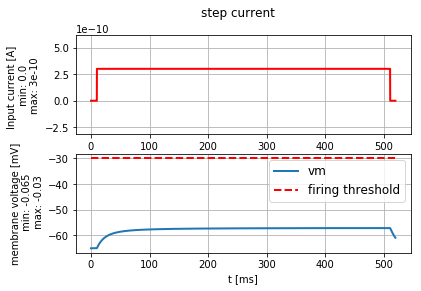

In [57]:
% matplotlib inline
import brian2 as b2
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

# code here: 
# inject a current for 200ms. Set the maximal amplitude such that the neuron does NOT spike.
# plot the current and the voltage.

input_current = input_factory.get_step_current(
    t_start=10, t_end=510, unit_time=b2.ms, amplitude=I_rh + 0*b2.pA)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=520*b2.ms, v_rheobase = exp_IF.RHEOBASE_THRESHOLD_v_rh)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current", 
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.2 Strength - Duration Curve [3+2 points]

The minimal amplitude to elicit a spike depends on the duration of the current. For an infinitely long current, we’ve just calculated the rheobase current. For short pulses and step currents, we can “experimentally” determine the minimal currents. If we plot the amplitude versus duration, we get the strength-duration curve.

Have a look at the following code: for the values `i = 0, 2` and `6` we did not provide the minimal amplitude, but the entries in `min_amp[i]` are set to 0. Complete the min_amp list.

- Set the function parameter `v_rheobase=-57mV` 
- Set the index `i` to 0
- Enter an informed guess into the min_amp table
- Run the script
- Depending on the plot, increase or decrease the amplitude, repeat until you just get one spike.
- Do the same for `i = 2` and `i = 6`


At the end of the script, the strength-duration curve is plotted. Discuss it. You may want to add a log-log plot to better see the asymptotic behaviour.

nr of spikes: 0


Text(0,0.5,'min amplitude [nAmp]')

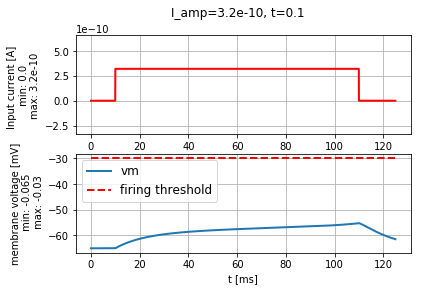

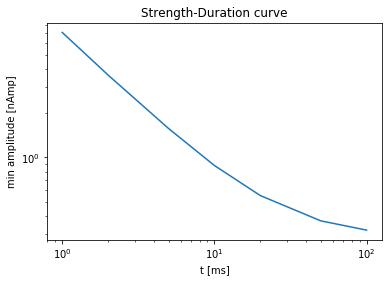

In [35]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

exp_IF.RHEOBASE_THRESHOLD_v_rh = -57*b2.mvolt

i=6
#change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [7.07, 3.63, 1.57, 0.88, 0.55, 0.37, 0.32]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+25)*b2.ms,
                                                                    v_rheobase = exp_IF.RHEOBASE_THRESHOLD_v_rh)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.figure()
plt.loglog(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

Describe your observations here [max 3 lines]


# Ex. 4. AdEx: the Adaptive Exponential Integrate-and-Fire model

Use function [`AdEx.simulate_AdEx_neuron()`](https://neuronaldynamics-exercises.readthedocs.io/en/latest/modules/neurodynex.adex_model.html#neurodynex.adex_model.AdEx.simulate_AdEx_neuron) to run the model for different input currents and different parameters. Get started by running the following script:

creating /tmp/scipy-kumilla-iZVAEI/python27_intermediate/compiler_dca32ba36a7317520a14e81b6e6de561
nr of spikes: 10


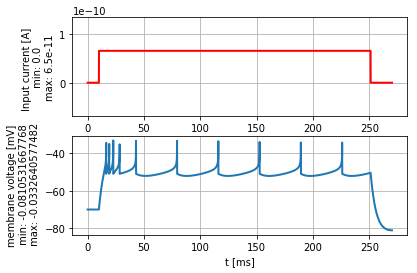

In [1]:
% matplotlib inline
import brian2 as b2
from neurodynex.adex_model import AdEx
from neurodynex.tools import plot_tools, input_factory

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=270 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))
#AdEx.plot_adex_state(state_monitor)


## 4.1. Exercise: Adaptation and firing patterns [7 points]

We have implemented an Exponential Integrate-and-Fire model with a single adaptation current
$\begin{split}\left[\begin{array}{ccll}
{\displaystyle \tau_m \frac{du}{dt}} &=& -(u-u_{rest}) + \Delta_T exp(\frac{u-\vartheta_{rh}}{\Delta_T}) - R w + R I(t) \\[.2cm]
{\displaystyle \tau_w \frac{dw}{dt}} &=& a (u-u_{rest}) -w  + b \tau_w \sum_{t^{(f)}} \delta (t - t^{(f)})
 \\[.2cm]
\end{array}\right.\end{split}$

- When you simulate the model with the default parameters, it produces the voltage trace shown above. Describe that firing pattern. Use the terminology of Fig. 6.1 in [Chapter 6.1](https://neuronaldynamics.epfl.ch/online/Ch6.S1.html) [max 2 lines, 1 point]

your answer:

High amplitude, initial burst

- Call the function `AdEx.simulate_AdEx_neuron()` with different parameters and try to create adapting, bursting and irregular firing patterns. [3 points]

**Note:** If you want to set a parameter to 0, Brian still expects a unit. Therefore use `a=0*b2.nS` instead of `a=0`.

If you do not specify any parameter, the following default values are used:

`MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms`

`MEMBRANE_RESISTANCE_R = 500*b2.Mohm`

`V_REST = -70.0 * b2.mV`

`V_RESET = -51.0 * b2.mV`

`RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV`

`SHARPNESS_delta_T = 2.0 * b2.mV`

`ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS`

`ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms`

`SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA`

nr of spikes: 18


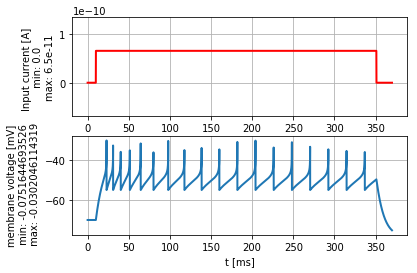

In [44]:
# adapting firing pattern
AdEx.ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
AdEx.ADAPTATION_VOLTAGE_COUPLING_a = 0.001 * b2.nS
AdEx.SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 5.0 * b2.pA
AdEx.MEMBRANE_TIME_SCALE_tau_m = 10 * b2.ms
AdEx.V_REST = -70 * b2.mV
AdEx.V_RESET = -55 * b2.mV

current = input_factory.get_step_current(10, 350, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=370 * b2.ms, 
                                                        tau_m = AdEx.MEMBRANE_TIME_SCALE_tau_m,
                                                        a = AdEx.ADAPTATION_VOLTAGE_COUPLING_a,
                                                        b = AdEx.SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                        tau_w = AdEx.ADAPTATION_TIME_CONSTANT_tau_w,
                                                        v_reset = AdEx.V_RESET)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 20


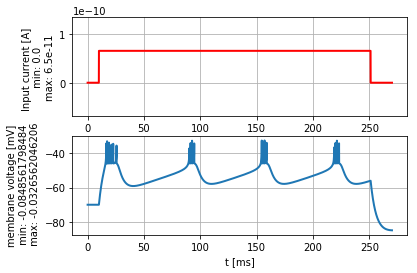

In [48]:
# bursting firing pattern
AdEx.ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
AdEx.ADAPTATION_VOLTAGE_COUPLING_a = -0.5 * b2.nS
AdEx.SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
AdEx.MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
AdEx.V_REST = -70 * b2.mV
AdEx.V_RESET = -46 * b2.mV

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=270 * b2.ms,
                                                        tau_m = AdEx.MEMBRANE_TIME_SCALE_tau_m,
                                                        a = AdEx.ADAPTATION_VOLTAGE_COUPLING_a,
                                                        b = AdEx.SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                        tau_w = AdEx.ADAPTATION_TIME_CONSTANT_tau_w,
                                                        v_reset = AdEx.V_RESET)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 3


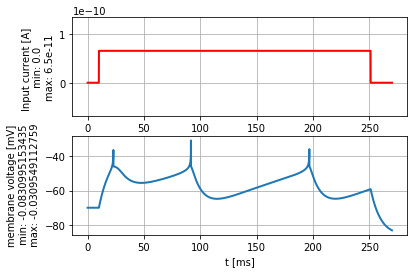

In [49]:
# irregular firing pattern
AdEx.ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
AdEx.ADAPTATION_VOLTAGE_COUPLING_a = -0.5 * b2.nS
AdEx.SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 50.0 * b2.pA
AdEx.MEMBRANE_TIME_SCALE_tau_m = 10* b2.ms
AdEx.V_REST = -70 * b2.mV
AdEx.V_RESET = -46 * b2.mV

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=270 * b2.ms,
                                                        tau_m = AdEx.MEMBRANE_TIME_SCALE_tau_m,
                                                        a = AdEx.ADAPTATION_VOLTAGE_COUPLING_a,
                                                        b = AdEx.SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
                                                        tau_w = AdEx.ADAPTATION_TIME_CONSTANT_tau_w,
                                                        v_reset = AdEx.V_RESET)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))

- In order to better understand the dynamics, it is useful to observe the joint evolution of `u` and `w` in a phase diagram. Use the function `AdEx.plot_adex_state()` to get more insights. Fig. 6.3 in Chapter 6 Section 2 shows the three trajectories in the phase diagram corresponding to the parameters choices you made in the previous exercise (for adapting, bursting and irregular firing patterns).
- Comment on the difference between the three regimes, on the base of the face place [max 5 lines, 1+2 points]

In [ ]:
# adapting firing pattern

In [ ]:
# bursting firing pattern

In [ ]:
# irregular firing pattern

your answer

## 4.2. Exercise: phase plane and nullclines [8 points]

First, try to get some intuition on shape of nullclines by plotting or simply sketching them on a piece of paper and answering the following questions.
Plot or sketch the u- and w- nullclines of the AdEx model (`I(t) = 0`)
- How do the nullclines change with respect to `a`?
- How do the nullclines change if a constant current `I(t) = c` is applied?
- What is the interpretation of parameter `b`?
- How do flow arrows change as tau_w gets bigger?

[max 10 lines, 4 points]

your answer

What would be the firing pattern if `a` is small (in the order of `0.01 nS`) ? To answer this, simulate the following 2 conditions [2 points] and write a short answer [max 5 lines, 2 points]:

- A large jump `b` and a large time scale `tau_w`.
- A small jump `b` and a small time scale `tau_w`.

In [ ]:
# A large jump b and a large time scale tau_w.

In [ ]:
# A small jump b and a small time scale tau_w.

your answer

### Additional material:

To learn more about the variety of patterns the relatively simple neuron model can reproduce, have a look the following publication: [Naud, R., Marcille, N., Clopath, C., Gerstner, W. (2008). Firing patterns in the adaptive exponential integrate-and-fire model. Biological cybernetics, 99(4-5), 335-347.](https://link.springer.com/article/10.1007/s00422-008-0264-7)